In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

In [2]:
# import Breast Cancer Wisconsin (Diagnostic) Data Set Version 2; 
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
data = pd.read_csv('BreastData.csv', header =0)
data.head()  # head method shows the first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# feature names as a list
col = data.columns       # .columns gives columns names 
print(col)

#Print a concise summary of a DataFrame; info about a DataFrame including the index dtype & column dtypes, 
#non-null values & memory usage
data.info()

# show a count of benign & malignant cases
data['diagnosis'].value_counts()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mea

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
# y labels and x features
y = data.diagnosis  # M (malignant) or B (benign)
list = ['id','diagnosis'] #selecting columns to drop from our independent variable(s)
x = data.drop(list,axis = 1 )
x.head()
#dramatic difference in the x.head output values from hundreths (i.e. 0.05667) to thousands (i.e. 2654). 
     #normalize the data before visualization, feature selection, feature extraction or classification.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Wisconsin Breast Cancer V2 Diagnoses Numbers
Number of Benign:  357
Number of Malignant :  212


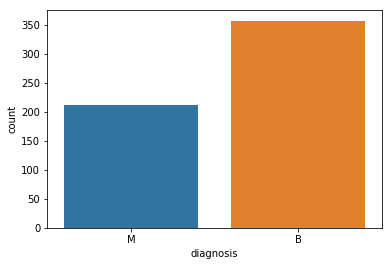

In [5]:
#Let's start by visualizing our Y (dependent variable); how many benign/malignant instances?
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Wisconsin Breast Cancer V2 Diagnoses Numbers')
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [6]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

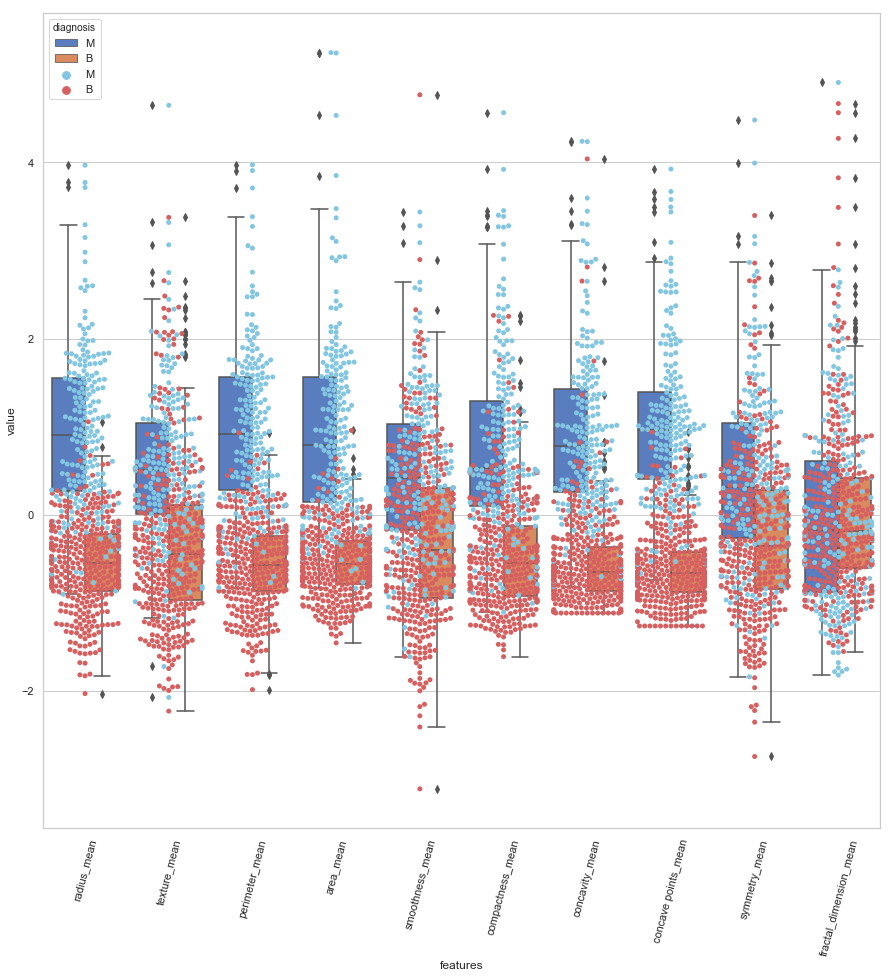

In [7]:
# first ten features
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())  # <-normalization = (observation (X) - mean (μ))/standard deviation (σ) 
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1) # select the 1st 10 columns
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
tic = time.time()
sns.boxplot(x="features", y="value", hue="diagnosis", data=data) #create box plot
sns.swarmplot(x="features", y="value", hue="diagnosis", palette=["c","r"], data=data) #create swarmplot, can overlay it on top of boxplot
plt.xticks(rotation=75)

#fractal_dimension_mean -> Not a significant separation between Benign & Malignant so not helpful feature for classification
# additional visualization/plot guidance https://seaborn.pydata.org/generated/seaborn.boxplot.html
# also for visualization helps -> https://seaborn.pydata.org/examples/index.html

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

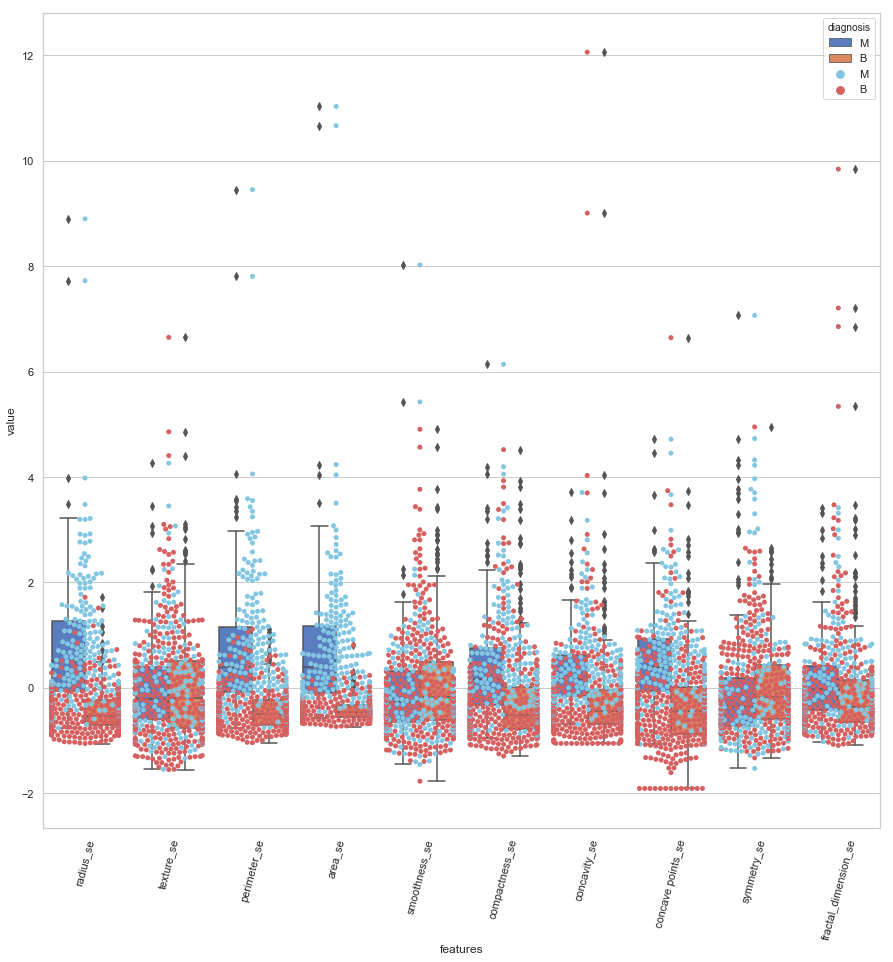

In [8]:
# Next ten features

data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1) # select just 2nd 10 columns
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
tic = time.time()
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
sns.swarmplot(x="features", y="value", hue="diagnosis", palette=["c","r"], data=data)
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

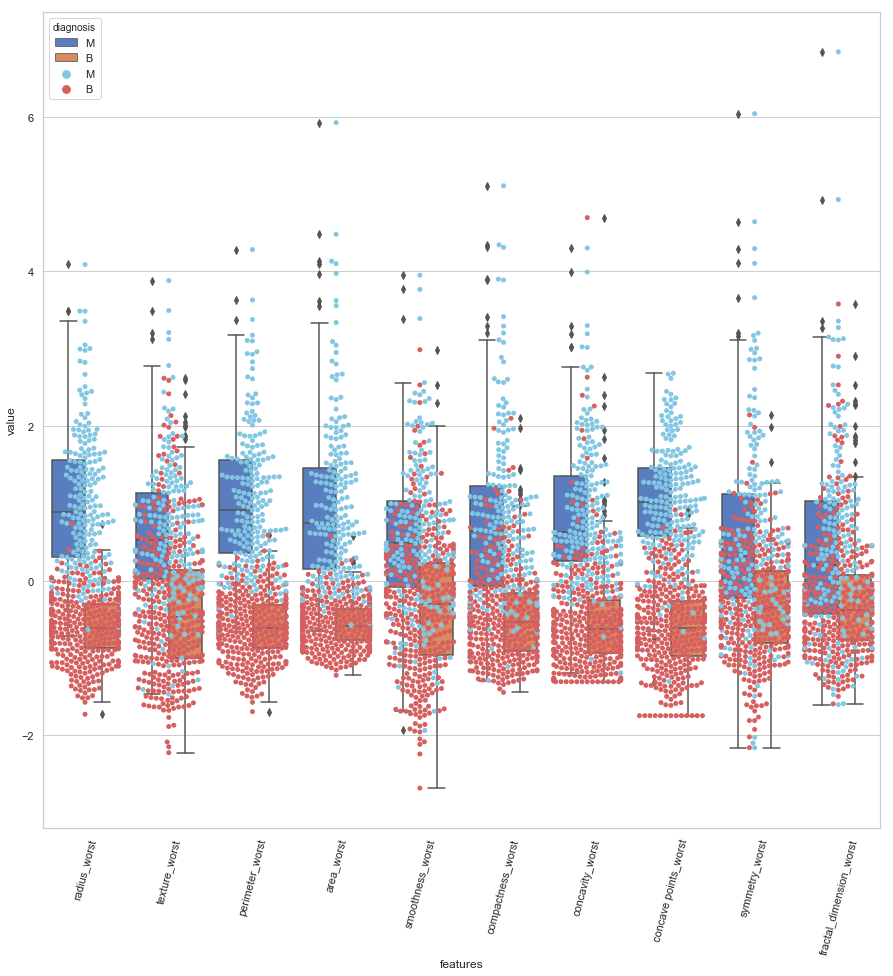

In [9]:
# Final ten features

data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1) # select just last 10 columns
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
tic = time.time()
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
sns.swarmplot(x="features", y="value", hue="diagnosis", palette=["c","r"], data=data)
plt.xticks(rotation=75)

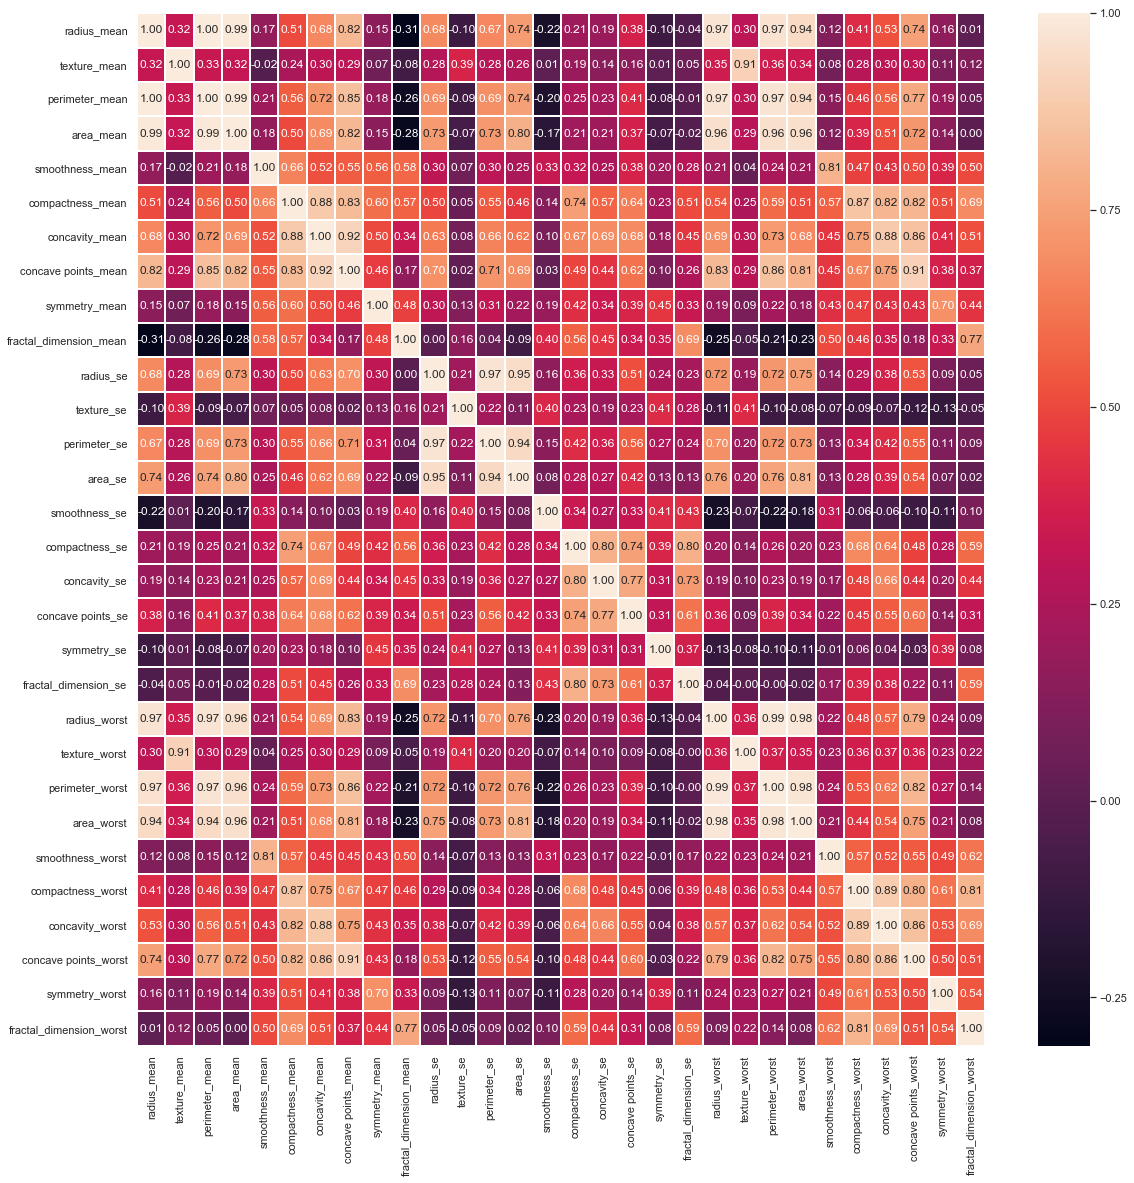

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(19, 19))
sns.heatmap(x.corr(), annot=True, linewidths=1, fmt= '.2f',ax=ax)
#http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [11]:
#Correlation and Feature selection
#I drop my selection of features depending on heat map & visual segregation of malignant/benign data points in the swarm plots
#drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concavity_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concavity_worst','compactness_se','concave points_se','texture_worst','area_mean']
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','area_worst','perimeter_worst','compactness_worst','concavity_worst','compactness_se','concave points_se','texture_worst','area_mean']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify X, we will use it later 
x_1.head()

,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,25.38,0.1622,0.2654,0.4601,0.11890
1,17.77,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,24.99,0.1238,0.1860,0.2750,0.08902
2,21.25,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,23.57,0.1444,0.2430,0.3613,0.08758
3,20.38,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,14.91,0.2098,0.2575,0.6638,0.17300
4,14.34,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,22.54,0.1374,0.1625,0.2364,0.07678


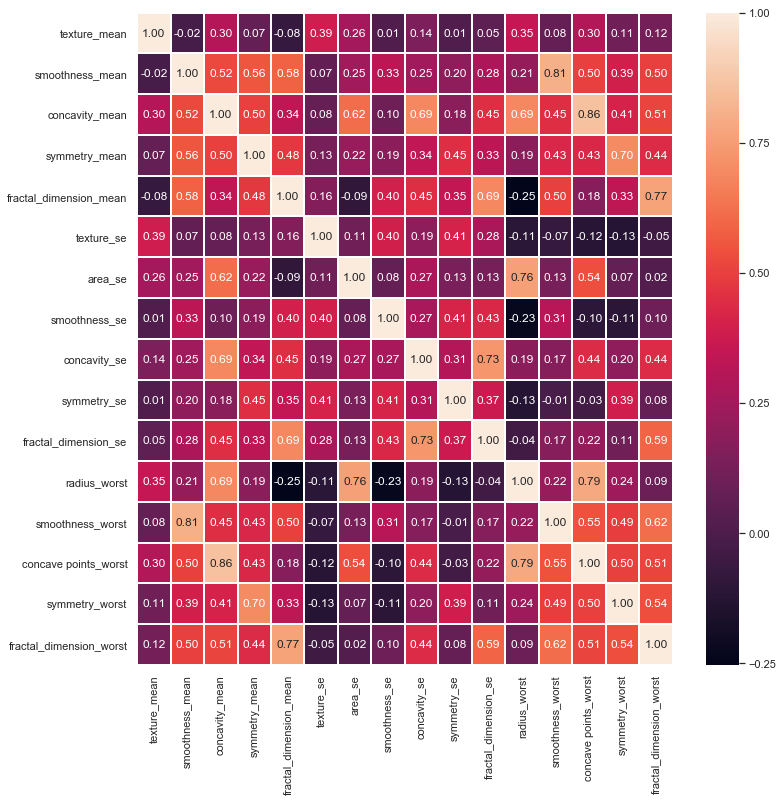

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(x_1.corr(), annot=True, linewidths=1, fmt= '.2f',ax=ax)

Accuracy is:  0.9766081871345029


C:\Users\TheDa\ANA\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


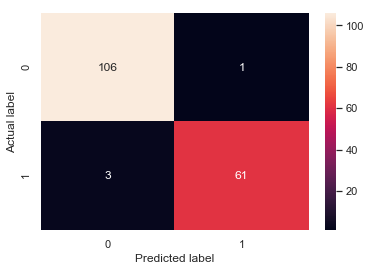

In [13]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=52) #If int, random_state is the seed used by the random number generator

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=47)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [14]:
from sklearn.svm import SVC

In [15]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3) #If int, random_state is the seed used by the random number generator

len(X_train)

398

In [16]:
len(X_test)

171

In [17]:
#Fit SVC model for all x attributes
#model_SVC = SVC(kernel='rbf', C=1.75, gamma=2**-3.5)
#model_SVC = SVC(kernel='linear', C=10, gamma='auto') #kernel needed to be set to 'linear' in order to achieve proper result
#model_SVC = SVC(kernel='linear', C=100, gamma=2**-2.5) #97.076% accuracy; kernel needed to be set to 'linear' in order to achieve proper result
model_SVC = SVC(kernel='linear', C=10, gamma=2**-2.5) 
#tried C=.1, 1, 10, 100 and best outcome was C=10; no improvement with C = 1000


In [18]:
model_SVC.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1767766952966369,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
model_SVC.score(X_test, y_test)

0.9824561403508771

Accuracy is:  0.9824561403508771


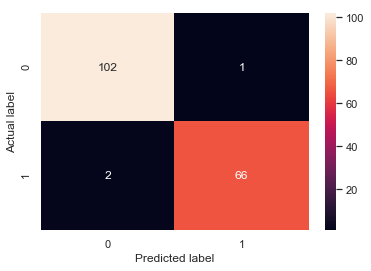

In [20]:
ac = accuracy_score(y_test,model_SVC.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,model_SVC.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

In [22]:
#looking for a starting point for K nearest neighbors. I started at 13 but worked up to 23 for best outcome
import math
math.sqrt(len(y_test))

13.076696830622021

In [23]:
#Good KNN Tutorial https://www.youtube.com/watch?v=4HKqjENq9OU
#model_KNN = neighbors.KNeighborsClassifier()
model_KNN = KNeighborsClassifier(n_neighbors=23, p=2, metric='euclidean')
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [24]:
model_KNN.score(X_test, y_test)

0.9005847953216374

Accuracy is:  0.9005847953216374


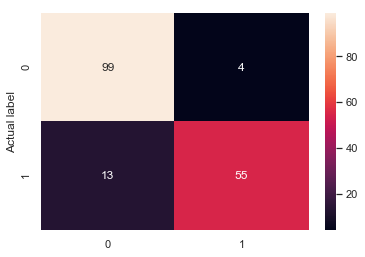

In [25]:
ac = accuracy_score(y_test,model_KNN.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,model_KNN.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual label');
#plt.xlabel('Predicted label');

In [26]:
#Univariate feature selection and random forest classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [27]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

#Best 5 features include: area_mean, area_se, texture_mean, concavity_worst and concavity_mean

Score list: [6.72229126e+01 1.09363917e-01 1.49033057e+01 2.01750806e-01
 7.27510274e-06 7.95093261e-02 6.10346212e+03 2.89349628e-03
 8.17749894e-01 3.14935125e-04 6.70745721e-03 3.52845727e+02
 2.88611867e-01 1.00854798e+01 9.50092203e-01 1.60261813e-01]
Feature list: Index(['texture_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'smoothness_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9766081871345029


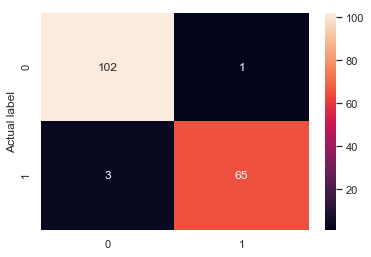

In [28]:
#use only the best 5 features from above
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
model_SVC_2 = SVC(kernel='linear', C=100, gamma='auto') 
model_SVC_2 = model_SVC_2.fit(X_train_2,y_train)
     
ac_2 = accuracy_score(y_test,model_SVC_2.predict(X_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,model_SVC_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
plt.ylabel('Actual label');
#plt.xlabel('Predicted label');